# Points

### Libraries

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport  # formerly pandas_profiling

## Data reading

In [2]:
# Retail Medellin
retail_gdf = gpd.read_file("Data/Retail/Medellin_base.gpkg", layer="Medellin_base")

## Data review

In [3]:
# Shape
retail_gdf.shape

(4840, 10)

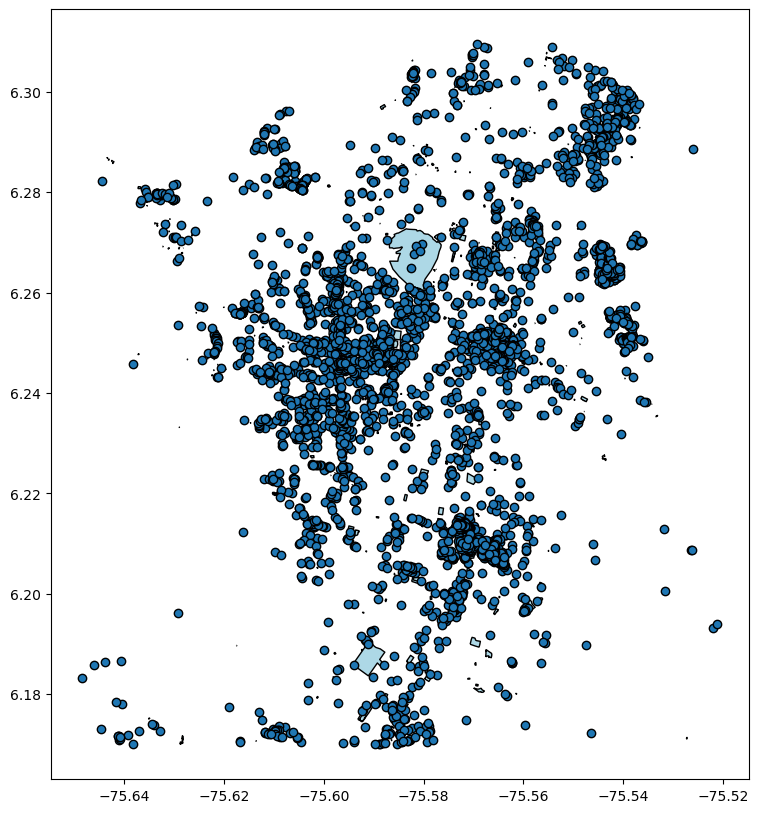

In [10]:
# Geometry
retail_gdf.plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [4]:
# Head
retail_gdf.head()

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
0,11889531019,nodes,Pandequesos santa rosa,None,Mo-Su 09:00-20:30,None,cafe,None,None,POINT (-75.55905 6.30593)
1,11848534981,nodes,Crispetas de pollo,None,None,None,fast_food,None,None,POINT (-75.56434 6.29204)
2,5871232950,nodes,Centro para el Desarrollo del Hábitat y la Con...,None,None,None,None,None,None,POINT (-75.56786 6.30361)
3,10121350372,nodes,Taberna Salsa Cañaveral,None,None,None,bar,None,None,POINT (-75.57188 6.3011)
4,10695760483,nodes,Delicias del Mar,None,None,None,restaurant,None,None,POINT (-75.5631 6.24561)


In [5]:
# Tail
retail_gdf.tail()

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
4835,5628414,relations,None,hairdresser,None,None,None,None,None,"POLYGON ((-75.60947 6.24807, -75.60945 6.24804..."
4836,6444774,relations,Hotel Colombia,None,None,None,None,None,hotel,"POLYGON ((-75.57403 6.25276, -75.574 6.25274, ..."
4837,6444857,relations,None,None,None,None,None,None,None,"POLYGON ((-75.57296 6.25392, -75.57294 6.2539,..."
4838,6480238,relations,Bloque 16 - Administrativo,None,None,None,None,None,None,"POLYGON ((-75.56858 6.26722, -75.56855 6.26722..."
4839,7460245,relations,Palacio de la Cultura Rafael Uribe Uribe,None,None,None,None,None,museum,"POLYGON ((-75.56852 6.25155, -75.56823 6.2514,..."


In [6]:
# Columns
retail_gdf.columns

Index(['osm_id', 'osm_type', 'name', 'shop', 'opening_hours', 'beds',
       'amenity', 'rooms', 'tourism', 'geometry'],
      dtype='object')

In [7]:
# Data type
retail_gdf.dtypes

osm_id              int64
osm_type           object
name               object
shop               object
opening_hours      object
beds               object
amenity            object
rooms              object
tourism            object
geometry         geometry
dtype: object

## EDA

### Non-spatial

In [13]:
# Drop geometry
retail_df = retail_gdf.drop(columns="geometry")

In [14]:
# Profile
profile = ProfileReport(retail_df, title="Data Profiling Report", explorative=True)

In [15]:
# Display result
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### osm_type

In [17]:
# Unique
retail_df['osm_type'].unique()

array(['nodes', 'ways_poly', 'relations'], dtype=object)

In [18]:
# relations
retail_df[retail_df['osm_type']=='relations']

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism
4829,8617012,relations,Centro Comercial Villanueva,mall,None,None,None,None,None
4830,6592273,relations,San Diego centro comercial,mall,Mo-Su 10:00-20:00,None,None,None,None
4831,2144702,relations,Dirección de Impuestos y Aduanas Nacionales,None,None,None,None,None,None
4832,6444838,relations,None,None,None,None,None,None,None
4833,6444733,relations,None,None,None,None,None,None,hotel
4834,3498645,relations,Éxito,department_store,None,None,None,None,None
4835,5628414,relations,None,hairdresser,None,None,None,None,None
4836,6444774,relations,Hotel Colombia,None,None,None,None,None,hotel
4837,6444857,relations,None,None,None,None,None,None,None
4838,6480238,relations,Bloque 16 - Administrativo,None,None,None,None,None,None


In [19]:
# relations
retail_df[retail_df['osm_type']=='ways_poly']

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism
4216,120374272,ways_poly,Tierra Libre,None,None,None,bar,None,None
4217,263305157,ways_poly,Placita de Flórez,None,None,None,marketplace,None,None
4218,571138987,ways_poly,None,None,None,None,None,None,hotel
4219,779546295,ways_poly,Centro de Negocios tres 33,None,None,None,None,None,None
4220,779552757,ways_poly,Cooperativa Consumo,supermarket,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
4824,1324434130,ways_poly,llantas y rines la 65,tyres,None,None,None,None,None
4825,1324434139,ways_poly,Frenos y suspenciones caribe,car_repair,None,None,None,None,None
4826,1324434142,ways_poly,encontremonos,None,None,None,restaurant,None,None
4827,1324440448,ways_poly,None,None,None,None,restaurant,None,None


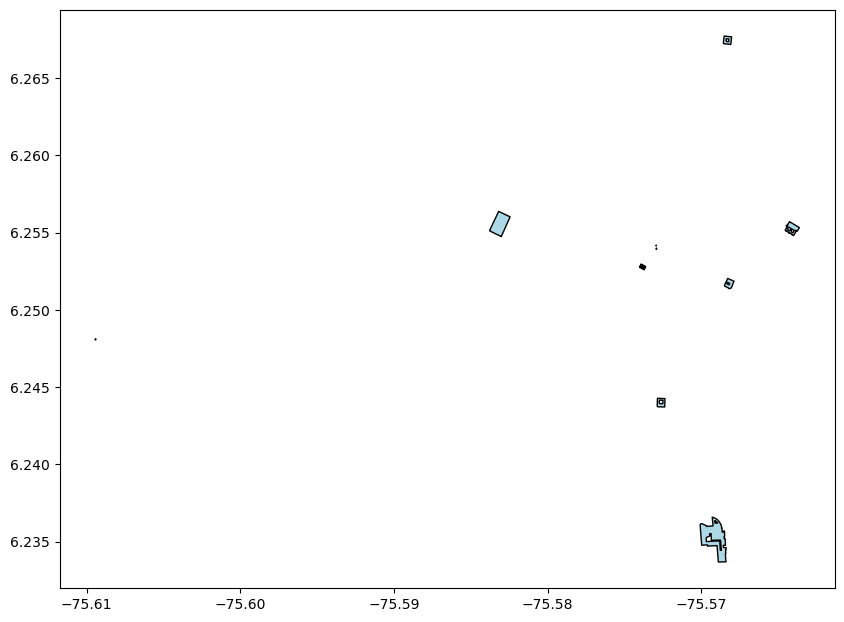

In [25]:
# Relations
retail_gdf[retail_gdf['osm_type']=='relations'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [33]:
# D1 testing - Relation
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "relations")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry


In [34]:
# Tostao testing - Relation
retail_gdf[
    (retail_gdf["name"].str.contains("Tostao", case=False, na=False)) &
    (retail_gdf["osm_type"] == "relations")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry


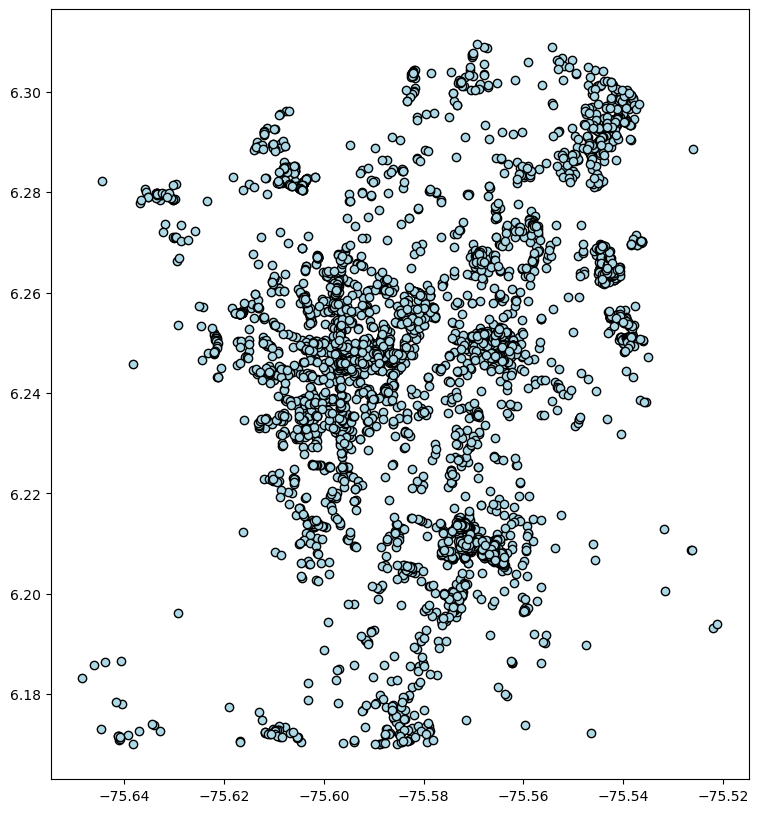

In [27]:
# Nodes
retail_gdf[retail_gdf['osm_type']=='nodes'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [31]:
# D1 testing - Nodes
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "nodes")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
15,9081190287,nodes,Tiendas D1,supermarket,None,None,None,None,None,POINT (-75.55341 6.27343)
16,11887891073,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58724 6.27986)
93,6327359287,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58291 6.27495)
94,6327383889,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58301 6.27485)
182,4803881522,nodes,D1 Buenos Aires,supermarket,Mo-Sa 08:00-21:00; Su 09:00-18:00,None,None,None,None,POINT (-75.55306 6.24104)
...,...,...,...,...,...,...,...,...,...,...
4126,7330357472,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.54421 6.26929)
4129,10620977536,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.55794 6.26431)
4133,9081194857,nodes,Tiendas D1 Manrique,supermarket,None,None,None,None,None,POINT (-75.5545 6.26728)
4183,6174428988,nodes,D1,supermarket,Mo-Su 07:00-21:00,None,None,None,None,POINT (-75.59363 6.20925)


In [32]:
# Tostao testing - nodes
retail_gdf[
    (retail_gdf["name"].str.contains("Tostao", case=False, na=False)) &
    (retail_gdf["osm_type"] == "nodes")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
98,7341634206,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.58424 6.28442)
361,7333441901,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.59546 6.23229)
797,11208056318,nodes,Tostao,None,None,None,cafe,None,None,POINT (-75.56339 6.25027)
884,9211442263,nodes,Punt Inic Tostao,None,None,None,restaurant,None,None,POINT (-75.58318 6.25783)
963,5452667823,nodes,Tostao’,bakery,None,None,cafe,None,None,POINT (-75.58168 6.25591)
1211,11403591025,nodes,Tostao,None,None,None,cafe,None,None,POINT (-75.57065 6.21311)
1223,6744094487,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.57131 6.20877)
2354,9243925008,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.59048 6.24456)
2418,9583400917,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.60911 6.24373)
2420,8176518517,nodes,Tostao’,None,None,None,cafe,None,None,POINT (-75.57628 6.19414)


<Axes: >

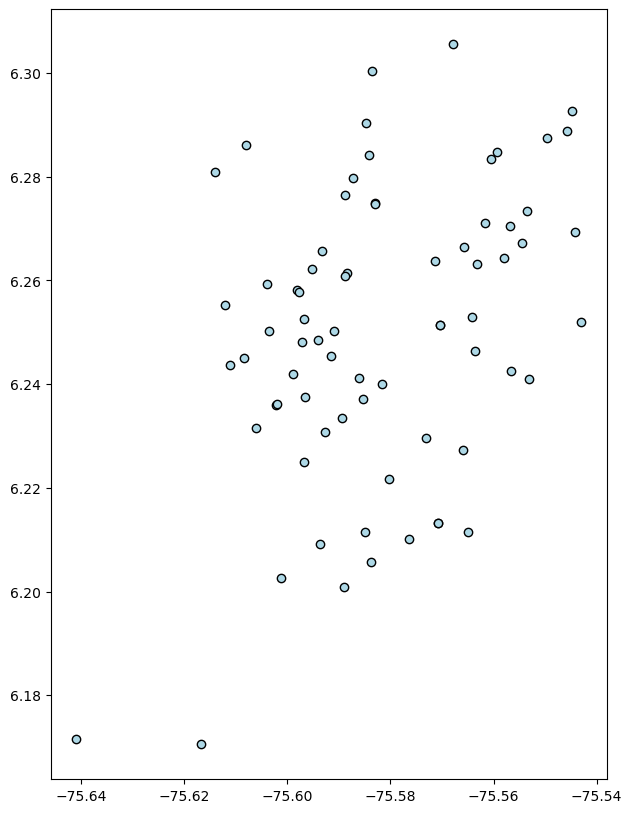

In [47]:
# Nodes - D1
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "nodes")
].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")

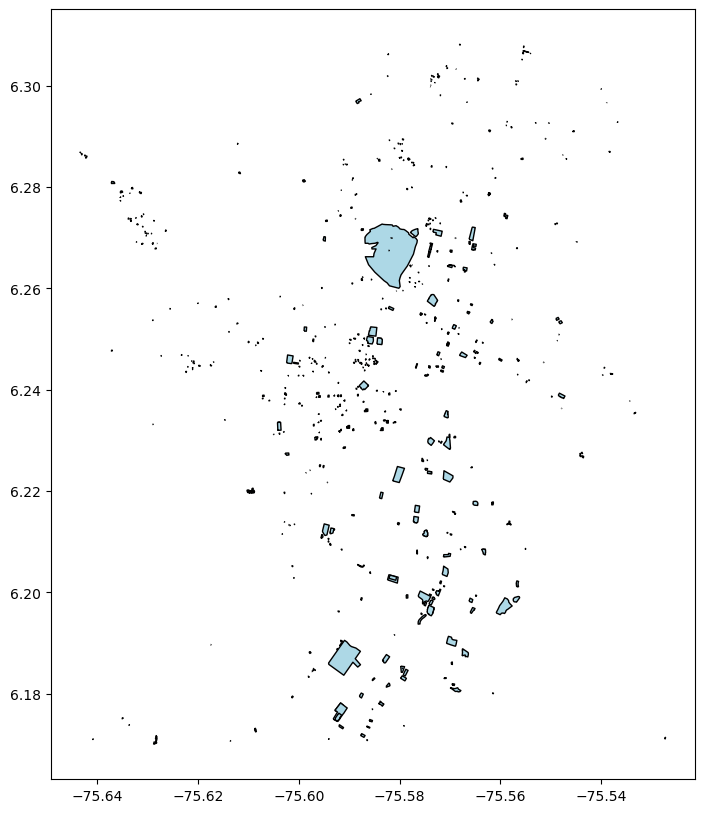

In [28]:
# Polygons
retail_gdf[retail_gdf['osm_type']=='ways_poly'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [37]:
# D1 testing - Polygons
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "ways_poly")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
4272,374040555,ways_poly,Supermercado D1 San Lucas,supermarket,Mo-Sa 08:00-21:00; Su 09:00-20:00,None,None,None,None,"POLYGON ((-75.56155 6.18007, -75.56139 6.18001..."
4309,130667687,ways_poly,Tienda D1,supermarket,None,None,None,None,None,"POLYGON ((-75.62857 6.26793, -75.62854 6.2678,..."
4348,784950560,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.60294 6.21954, -75.60282 6.21953..."
4353,784946245,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.59711 6.2332, -75.5971 6.23286, ..."
4439,579078182,ways_poly,Tiendos D1,supermarket,None,None,None,None,None,"POLYGON ((-75.56966 6.29252, -75.56945 6.29245..."
4471,1043603171,ways_poly,Tienda D1 estación Progreso,supermarket,None,None,None,None,None,"POLYGON ((-75.58232 6.30629, -75.58232 6.30621..."
4514,440415319,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.59415 6.24344, -75.59404 6.24332..."
4518,546263208,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.61764 6.24489, -75.61744 6.2447,..."
4535,377765989,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.60862 6.24875, -75.6086 6.24872,..."
4573,275091515,ways_poly,D1,convenience,None,None,None,None,None,"POLYGON ((-75.57731 6.28433, -75.57727 6.28422..."


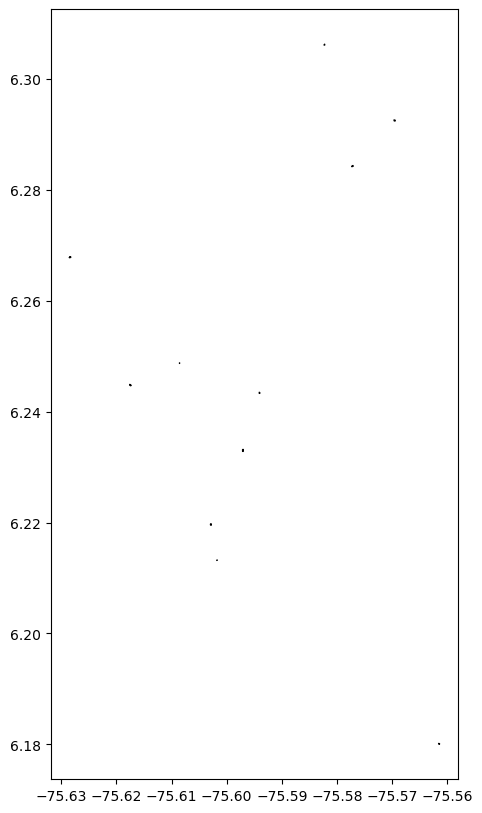

In [40]:
# Plot D1 polygons
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "ways_poly")
].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [43]:
# Tostao testing - polygons
retail_gdf[
    (retail_gdf["name"].str.contains("Tostao", case=False, na=False)) &
    (retail_gdf["osm_type"] == "ways_poly")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry


In [52]:
# D1 testing - polygons
retail_gdf[
    (retail_gdf["name"].str.contains("D1", case=False, na=False)) &
    (retail_gdf["osm_type"] == "ways_poly")
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
4272,374040555,ways_poly,Supermercado D1 San Lucas,supermarket,Mo-Sa 08:00-21:00; Su 09:00-20:00,None,None,None,None,"POLYGON ((-75.56155 6.18007, -75.56139 6.18001..."
4309,130667687,ways_poly,Tienda D1,supermarket,None,None,None,None,None,"POLYGON ((-75.62857 6.26793, -75.62854 6.2678,..."
4348,784950560,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.60294 6.21954, -75.60282 6.21953..."
4353,784946245,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.59711 6.2332, -75.5971 6.23286, ..."
4439,579078182,ways_poly,Tiendos D1,supermarket,None,None,None,None,None,"POLYGON ((-75.56966 6.29252, -75.56945 6.29245..."
4471,1043603171,ways_poly,Tienda D1 estación Progreso,supermarket,None,None,None,None,None,"POLYGON ((-75.58232 6.30629, -75.58232 6.30621..."
4514,440415319,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.59415 6.24344, -75.59404 6.24332..."
4518,546263208,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.61764 6.24489, -75.61744 6.2447,..."
4535,377765989,ways_poly,D1,supermarket,None,None,None,None,None,"POLYGON ((-75.60862 6.24875, -75.6086 6.24872,..."
4573,275091515,ways_poly,D1,convenience,None,None,None,None,None,"POLYGON ((-75.57731 6.28433, -75.57727 6.28422..."


## Data cleaning

In [41]:
# Droping relations
retail_clean_gdf = retail_gdf[~retail_gdf["osm_type"].isin(["relations"])]

## Pre processing

In [48]:
# Polygons to points
retail_clean_gdf["geometry"] = retail_clean_gdf["geometry"].apply(lambda geom: geom.centroid if geom.geom_type == "Polygon" else geom)

c:\Users\Andres\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Subsetting

In [73]:
# D1 testing - polygons

search_d1 = ["D1", "D 1"]

d1_terms = '|'.join(search_d1)

retail_clean_gdf[
    (retail_clean_gdf["name"].str.contains(d1_terms, case=False, na=False)) 
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
15,9081190287,nodes,Tiendas D1,supermarket,None,None,None,None,None,POINT (-75.55341 6.27343)
16,11887891073,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58724 6.27986)
93,6327359287,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58291 6.27495)
94,6327383889,nodes,D1,supermarket,None,None,None,None,None,POINT (-75.58301 6.27485)
182,4803881522,nodes,D1 Buenos Aires,supermarket,Mo-Sa 08:00-21:00; Su 09:00-18:00,None,None,None,None,POINT (-75.55306 6.24104)
...,...,...,...,...,...,...,...,...,...,...
4514,440415319,ways_poly,D1,supermarket,None,None,None,None,None,POINT (-75.59406 6.24341)
4518,546263208,ways_poly,D1,supermarket,None,None,None,None,None,POINT (-75.61748 6.24481)
4535,377765989,ways_poly,D1,supermarket,None,None,None,None,None,POINT (-75.60857 6.24877)
4573,275091515,ways_poly,D1,convenience,None,None,None,None,None,POINT (-75.57718 6.28432)


In [74]:
# gdf D1
d1_gdf = retail_clean_gdf[
    (retail_clean_gdf["name"].str.contains(d1_terms, case=False, na=False)) 
]

In [75]:
# Shape
d1_gdf.shape

(83, 10)

In [76]:
# Exito testing - polygons

search_exito = ["éxito", "Exito"]

exito_terms = '|'.join(search_exito)

retail_clean_gdf[
    (retail_clean_gdf["name"].str.contains(exito_terms, case=False, na=False)) 
]

,osm_id,osm_type,name,shop,opening_hours,beds,amenity,rooms,tourism,geometry
71,3799655734,nodes,Éxito Verde,supermarket,None,None,None,None,None,POINT (-75.5413 6.29102)
352,1197785564,nodes,Éxito Belén,supermarket,"Mo-Su 7:30-21:00, Su 7:30-19:30, PH 7:30-19:30",None,None,None,None,POINT (-75.5964 6.23055)
396,2529942658,nodes,Éxito Los Molinos,supermarket,Mo-Su 08:00-21:00,None,None,None,None,POINT (-75.60393 6.23214)
404,5532308368,nodes,Exito Express,supermarket,None,None,None,None,None,POINT (-75.60184 6.22988)
859,7330310072,nodes,Éxito Express,supermarket,None,None,None,None,None,POINT (-75.57455 6.22225)
870,2529942929,nodes,Éxito del Este,supermarket,"Mo-We 8:30-21:00;Th-Sa 00:00-24:00;Su,PH 8:30-...",None,None,None,None,POINT (-75.55719 6.19859)
896,5495196363,nodes,éxito express,supermarket,None,None,None,None,None,POINT (-75.58887 6.26329)
1075,2529943209,nodes,ÉXITO MARACAIBO,supermarket,"Mo-Sa 07:30-20:00; Su,PH 09:00-15:00",None,None,None,None,POINT (-75.56586 6.25136)
2160,2529943402,nodes,Éxito,department_store,"Mo-Sa 8:30-21:00; Su,PH 9:00-20:00",None,None,None,None,POINT (-75.59382 6.2732)
2509,2529943053,nodes,Éxito Guayaquil,supermarket,Mo-Sa 8:30-19:30,None,None,None,None,POINT (-75.57093 6.24829)


In [77]:
# Exito gdf
exito_gdf = retail_clean_gdf[
    (retail_clean_gdf["name"].str.contains(exito_terms, case=False, na=False)) 
]


In [78]:
# shape
exito_gdf.shape

(25, 10)

## Salida geográfica

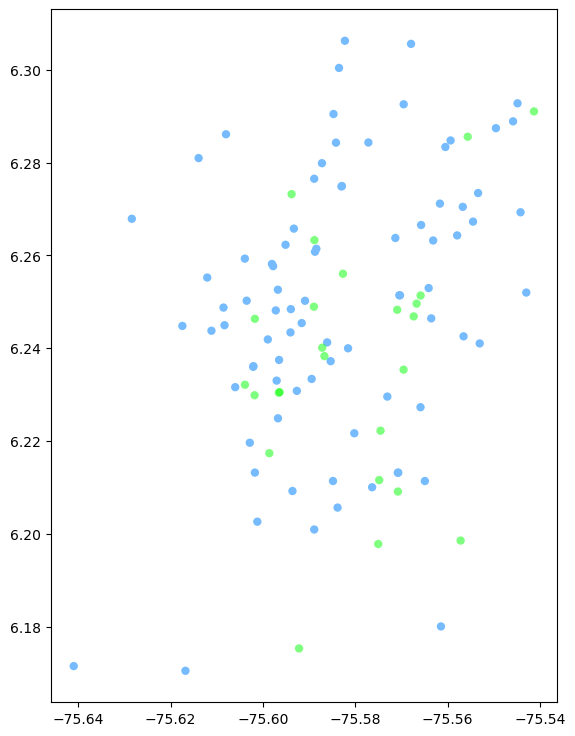

In [79]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

# Plot all three GeoPackages to the same axes
# boros.boundary.plot(color="red",ax=ax )
d1_gdf.plot(edgecolor="none",facecolor="xkcd:sky blue",ax=ax)
exito_gdf.plot(edgecolor="none",color=(0, 1, 0 ,0.5),ax=ax)

plt.show()